<h1>Статистический анализ данных интернет-магазина «Стримчик» о продажах игр, оценок пользователей и экспертов, жанрах и платформах</h1>

<h2>Описание проекта </h2>

Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Необходимо корректно обработать полученные данные и на их основе исследовать и визуализировать интересующие заказчика показатели.

<h2>Цель проекта</h2>

Цель проекта - это анализ данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах, а также проверка некоторых гипотез, которые могут помочь бизнесу вырасти.

<h2> План работы </h2>

*  Загрузка данных из имеющейся таблицы
*  Предобработка данных (корректировка, удаление пустых значений, приведение к корректному типу данных)
*  Исследовательский анализ интересующих заказчика данных с построением графиков, гистограмм
*  Составление портрета пользователя каждого региона
*  Проверка озвученных заказчиком гипотез на основе исследовательского анализа данных
*  Составление общего вывода

In [2]:
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

<b>Загрузка данных

In [3]:
# считываем данные из CSV-файлы с данными
total_shop = pd.read_csv('games.csv')

In [4]:
# изучим датафрейм 'total_shop' 
total_shop.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

In [5]:
total_shop.head(30)

Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS           2005.0   
12                   Pokemon Gold/Pokemon Silver       GB           1999.0   
13                                       Wii Fit      Wii           2007.0   
14                            Kinect Adventures!     X360           2010.0   
15                                  Wii Fit Plus      Wii           2009.0   
16                            Grand Theft Auto V      PS3           2013.0   
17                 Grand Theft Auto: San Andreas      PS2           2004.0   
18                             Super Mario World     SNES           1990.0   
19  Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   
20                 Pokemon Diamond/Pokemon Pearl       DS           2006.0   
21                              Super Mario Land       GB           1989.0   
22                           Super Mario Bros. 3      NES           1988.0   
23                            Grand Theft Auto V     X360           2013.0   
24                   Grand Theft Auto: Vice City      PS2           2002.0   
25                 Pokemon Ruby/Pokemon Sapphire      GBA           2002.0   
26   Brain Age 2: More Training in Minutes a Day       DS           2005.0   
27                   Pokemon Black/Pokemon White       DS           2010.0   
28                        Gran Turismo 3: A-Spec      PS2           2001.0   
29                Call of Duty: Modern Warfare 3     X360           2011.0   

           Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
0         Sports     41.36     28.96      3.77         8.45          76.0   
1       Platform     29.08      3.58      6.81         0.77           NaN   
2         Racing     15.68     12.76      3.79         3.29          82.0   
3         Sports     15.61     10.93      3.28         2.95          80.0   
4   Role-Playing     11.27      8.89     10.22         1.00           NaN   
5         Puzzle     23.20      2.26      4.22         0.58           NaN   
6       Platform     11.28      9.14      6.50         2.88          89.0   
7           Misc     13.96      9.18      2.93         2.84          58.0   
8       Platform     14.44      6.94      4.70         2.24          87.0   
9        Shooter     26.93      0.63      0.28         0.47           NaN   
10    Simulation      9.05     10.95      1.93         2.74           NaN   
11        Racing      9.71      7.47      4.13         1.90          91.0   
12  Role-Playing      9.00      6.18      7.20         0.71           NaN   
13        Sports      8.92      8.03      3.60         2.15          80.0   
14          Misc     15.00      4.89      0.24         1.69          61.0   
15        Sports      9.01      8.49      2.53         1.77          80.0   
16        Action      7.02      9.09      0.98         3.96          97.0   
17        Action      9.43      0.40      0.41        10.57          95.0   
18      Platform     12.78      3.75      3.54         0.55           NaN   
19          Misc      4.74      9.20      4.16         2.04          77.0   
20  Role

In [6]:
total_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


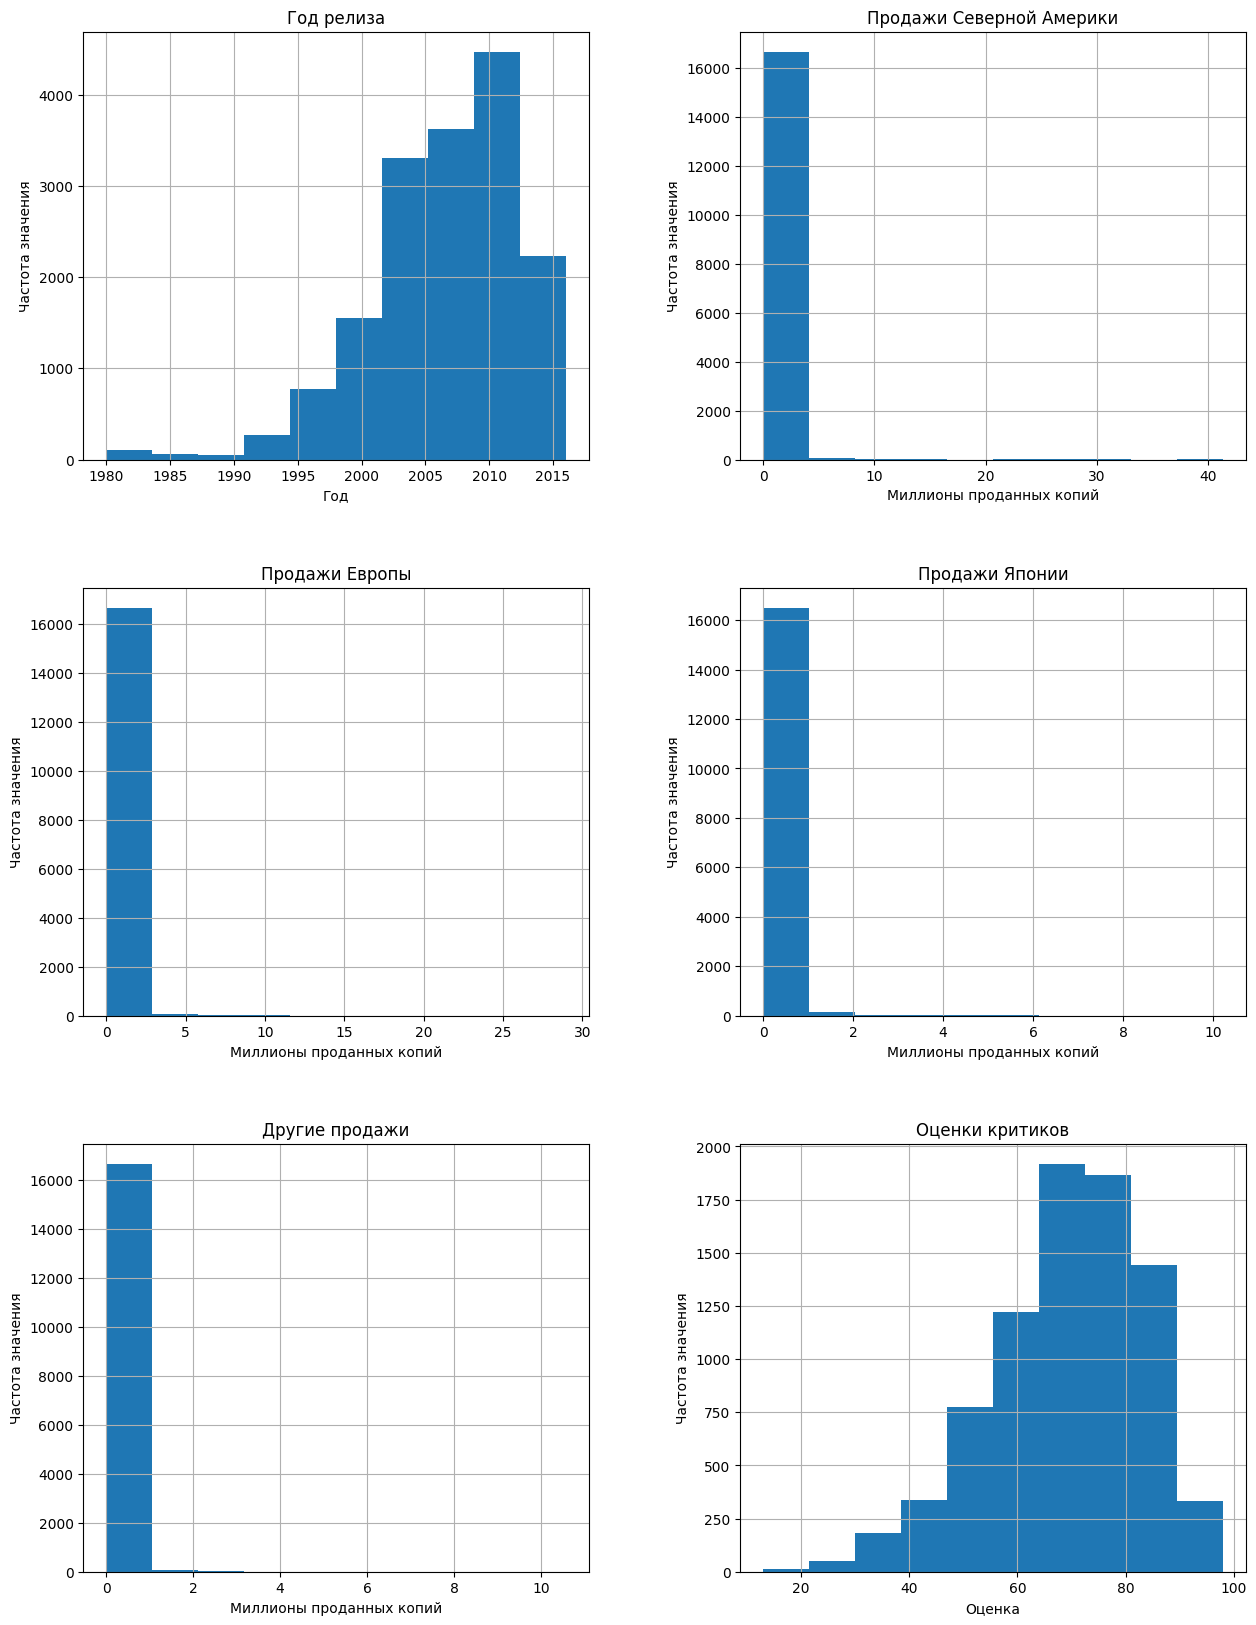

In [7]:
fig = total_shop.hist(figsize=(15,20))
tables = ['Год релиза', 'Продажи Северной Америки', 'Продажи Европы', 'Продажи Японии', 'Другие продажи', 'Оценки критиков']
xlabel_tables = ['Год', 'Миллионы проданных копий', 'Миллионы проданных копий', 'Миллионы проданных копий', 'Миллионы проданных копий','Оценка']
cnt = 0
for ax in fig.ravel():
    ax.set_title(tables[cnt])
    ax.set_xlabel(xlabel_tables[cnt])
    ax.set_ylabel("Частота значения")
    cnt +=1

In [8]:
# проверим наличие явных дубликатов
total_shop.duplicated().sum()

0

Возможно игру вносили несколько раз, получая информацию о разных рынках продажи. Удалим возможные неявные дубликаты по имени, платформе и году релиза одновременно.

In [9]:
total_shop = total_shop.drop_duplicates (subset=['Name', 'Platform', 'Year_of_Release'], keep = 'first')

Из загрузки данных можно сделать вывод что:
* явных дубликатов не обнаружено
* обнаружены строки с одинаковыми именем, платформой и годом релиза
* датафрейм не имеет ярко выраженных выбросов
* имеются пропуски в некоторых столбцах
* столбец с годом релиза должен быть типа int
* столбец с оценкой критиков должен быть типа int
* столбец с оценкой пользователя должен быть float

<b>Предобработка данных

In [10]:
# приведём столбцы датафрема к нижнему регистру
total_shop.columns = total_shop.columns.str.lower()

In [11]:
# обработаем пропуски
# начнём с наименования
total_shop[total_shop['name'].isnull()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659  NaN      GEN           1993.0   NaN      1.78      0.53       0.0   

     other_sales  critic_score user_score rating  
659         0.08           NaN        NaN    NaN

Обнаружена строка с наименованияем игры. Там же присутствует пропуск и в жанре. Данную строку можем удалить.

In [12]:
total_shop = total_shop.dropna(subset = ['name'])

In [13]:
# проанализируем уникальные значения оценок пользователей
total_shop['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим что присутствует значение 'tbd'. Можем сделать предположение что по данной игре не было отзывов либо их было недостаточно для формирования оценки

In [14]:
# заменим значение "tbd" - "to be determined" на NaN и приведем тип 'user_score' к числу с плавающей запятой
total_shop['user_score'] = total_shop['user_score'].replace('tbd', np.NaN)
total_shop['user_score'] = total_shop['user_score'].astype('float64')

In [15]:
# приведем годы релиза и оценки критиков в целочисленный тип
total_shop['year_of_release'] = total_shop['year_of_release'].astype('Int64')
total_shop['critic_score'] = total_shop['critic_score'].astype('Int64')

In [16]:
# создадим отдельный столбец для суммарных продаж
total_shop['total_sales'] = total_shop['na_sales'] + total_shop['eu_sales'] + total_shop['jp_sales'] + total_shop['other_sales']

In [17]:
total_shop.head(10)

name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     41.36     28.96      3.77         8.45            76         8.0      E   
1     29.08      3.58      6.81         0.77          <NA>         NaN    NaN   
2     15.68     12.76      3.79         3.29            82         8.3      E   
3     15.61     10.93      3.28         2.95            80         8.0      E   
4     11.27      8.89     10.22         1.00          <NA>         NaN    NaN   
5     23.20      2.26      4.22         0.58          <NA>         NaN    NaN   
6     11.28      9.14      6.50         2.88            89         8.5      E   
7     13.96      9.18      2.93         2.84            58         6.6      E   
8     14.44      6.94      4.70         2.24            87         8.4      E   
9     26.93      0.63      0.28         0.47          <NA>         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  
5        30.26  
6        29.80  
7        28.91  
8        28.32  
9        28.31

Можно сделать вывод о том что получилось много пропусков в столбцах rating, critic_score, user_score. Данные строки мы вынуждены оставить поскольку среди игр могут быть те, которые только-только вышли  и еще не успели получить оценки критиков и пользователей.

<b>Выводы по предобработке данных.</b>
    
* была проведена проверка на явные дубликаты. Явных дубликатов обнаружено не было.
* далее были проведены проверка и удаление строк с одинаковыми значениями имени, платформы и года релиза. Это связано с тем что данные о продажах собирались из многих источников и существовала вероятность того что в итоговый датафрейм могли попасть одинаковые данные выхода соответствущего релиза.
* для удобства обработки столбцы датафрема были приведены к нижнему регистру
* далее был удален один пропуск в строке с пустым значением в наименовании игры
* в наборе значений пользовательских оценко было обнаружено tbd" - "to be determined". Делаем вывод что игры с этим значением только-только вышли и еще не получили ни одной оценки. Заменили это значение на Nan
* вместе с тем не были удалены строки где в значениях year_of_release были пустые значения. Это может быть связано с тем что у данной игры еще не было официального релиза, однако альфа-версия уже доступна.

In [18]:
# Посмотрим, что у нас осталось
temp = total_shop.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   Int64  
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
 11  total_sales      16712 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

<b>Исследовательский анализ данных

Рассмотрим сколько игр выпускалось в разные годы.

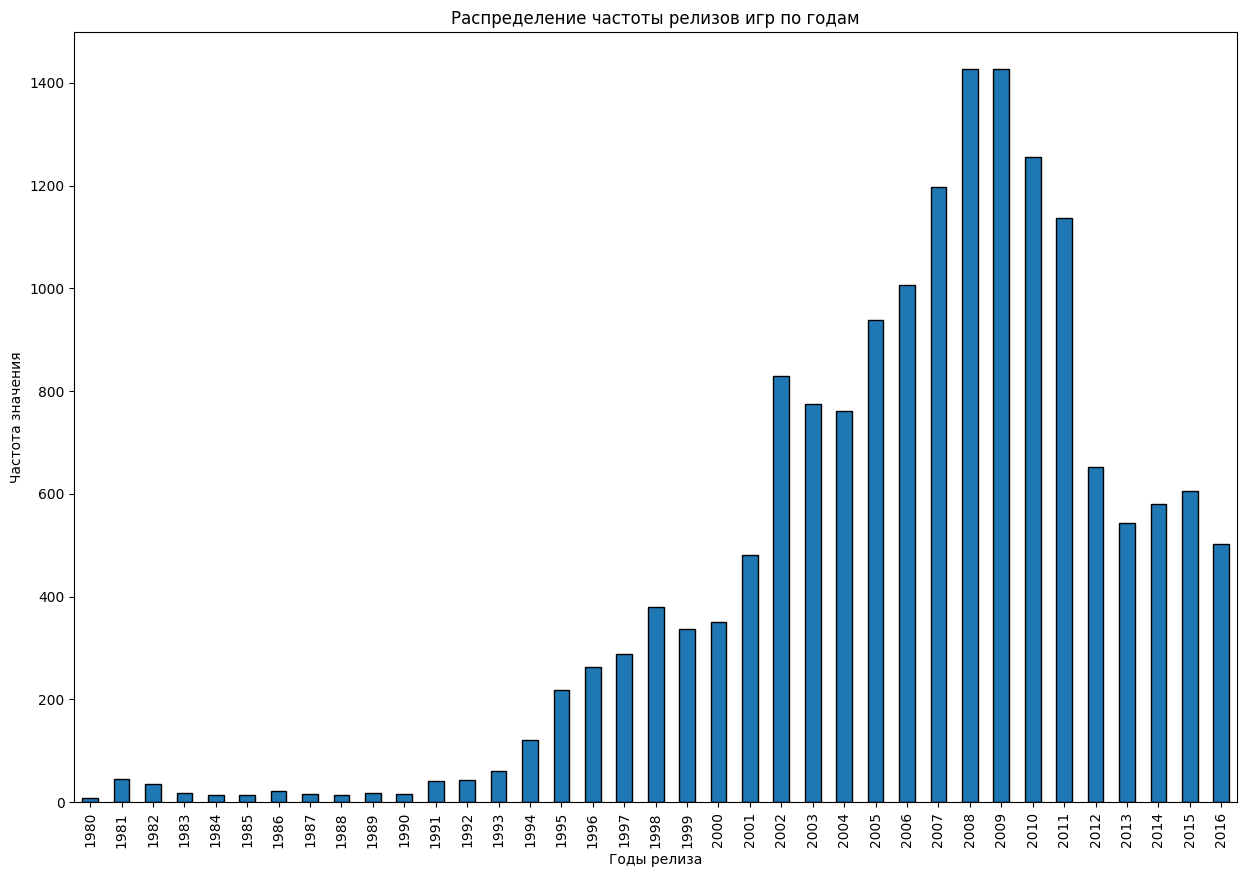

In [19]:
total_shop_to_plot = total_shop[total_shop['year_of_release'] != 0]
total_to_plot = total_shop_to_plot.groupby('year_of_release')['name']
total_to_plot_calculated = total_to_plot.count()
figsize = (15,10)
plot = total_to_plot_calculated.plot(kind='bar', y='name', figsize=figsize, ec='black')
plot.set_title("Распределение частоты релизов игр по годам")
plot.set_xlabel("Годы релиза")
plot.set_ylabel("Частота значения")
plt.show()

Из столбчатой диограммы можно сделать вывод что рост выпуска игра берет свое начало в 1994 году. Это может быть связано с тем что до 1994 года операционные системы тех времен не позволяли создавать и воспроизводить игры. Также это можно объяснить тем  что персональные компьютеры в доме для тех времен были редким явлением.
<br>Затем резкий скачок наблюдается в 2002 году. Это можно объяснить резким повышением зрелищности и реалистичности выпускаемых компьютерных игр.
<br> Пик роста 2008-2009 годы. После этого наблюдается постепенный спад. Это можно объяснить резким спросом на мобильные устройства в частности смартфоны.

Далее определим 10 платформ-лидеров по продажам за весь анализируемый период

In [20]:
total_to_plot = total_shop.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
top10_platforms = total_to_plot.reset_index()
iloc_top10_platforms = top10_platforms.iloc[0:10]
top10_platforms = iloc_top10_platforms['platform'].unique()
iloc_top10_platforms

platform  total_sales
0      PS2      1255.77
1     X360       971.42
2      PS3       939.64
3      Wii       907.51
4       DS       806.12
5       PS       730.86
6      GBA       317.85
7      PS4       314.14
8      PSP       294.05
9       PC       259.52

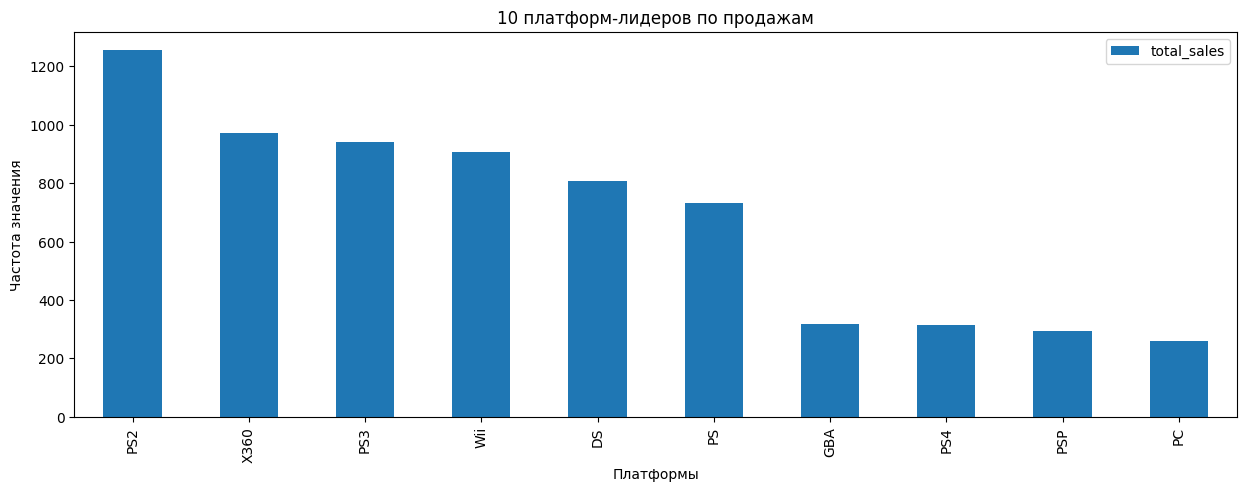

In [21]:
plot = iloc_top10_platforms.plot(x="platform", y="total_sales", kind='bar', figsize=(15,5))
plot.set_title("10 платформ-лидеров по продажам")
plot.set_xlabel("Платформы")
plot.set_ylabel("Частота значения")
plt.show()

Посмотрим, как менялись по годам продажи по платформам-лидерам. Начнём по порядку. Первая PS2

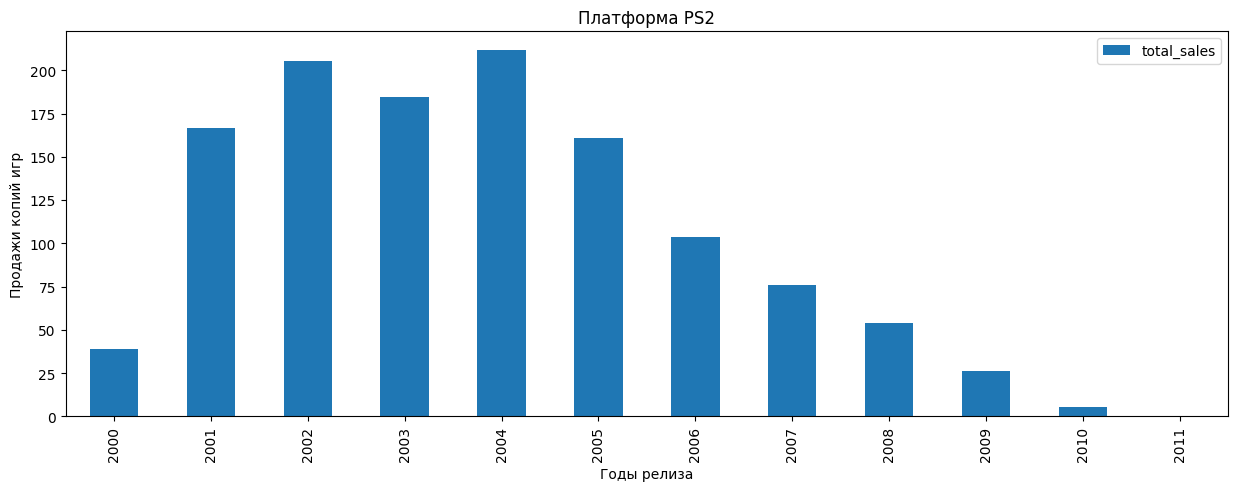

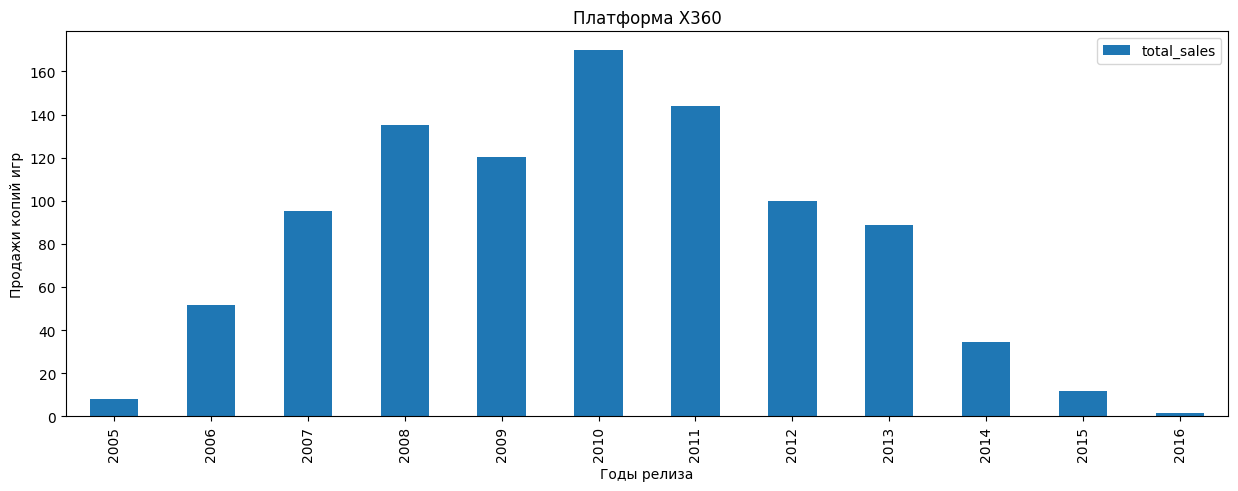

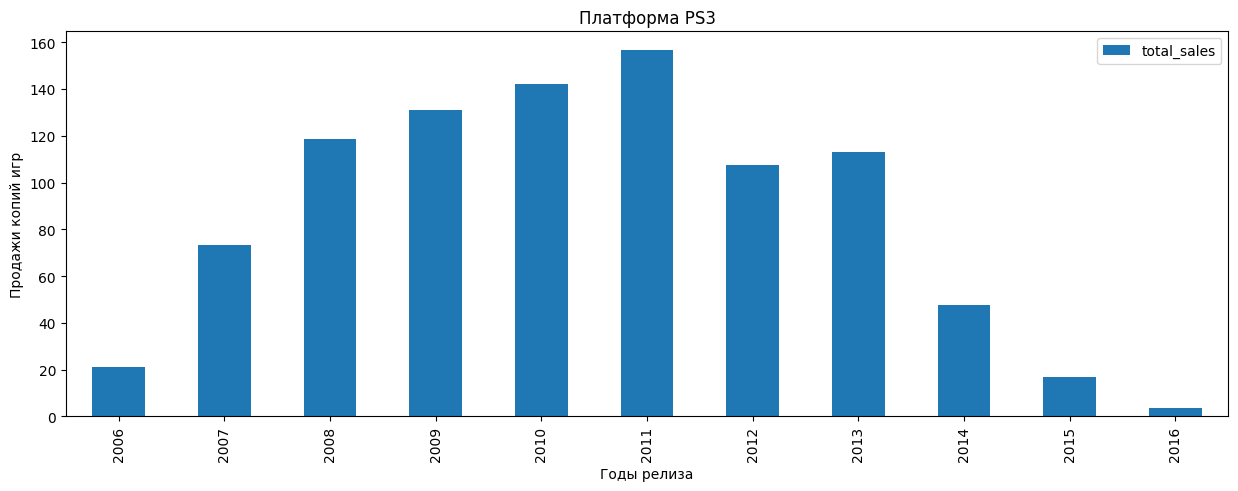

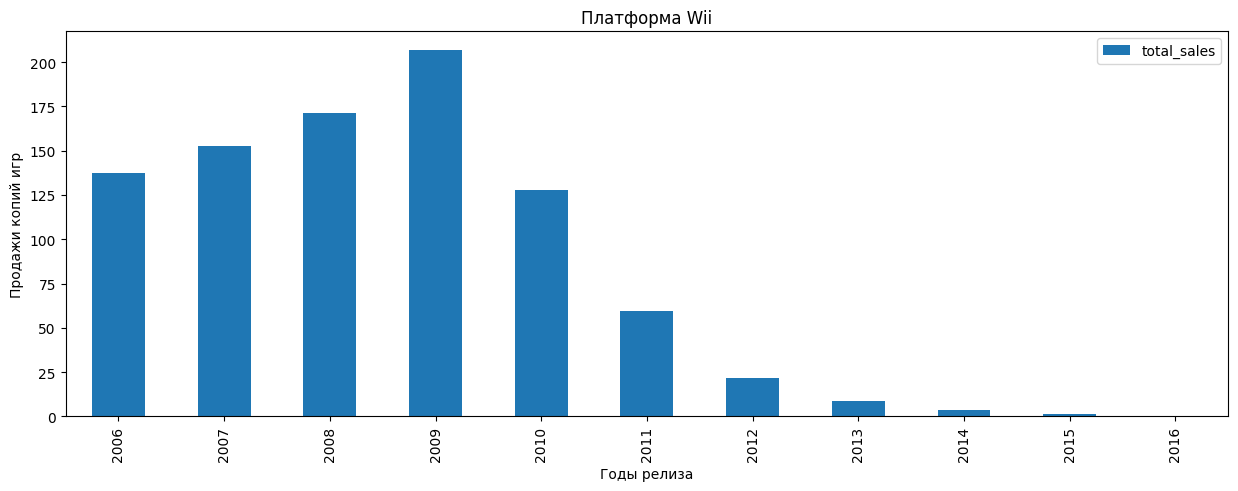

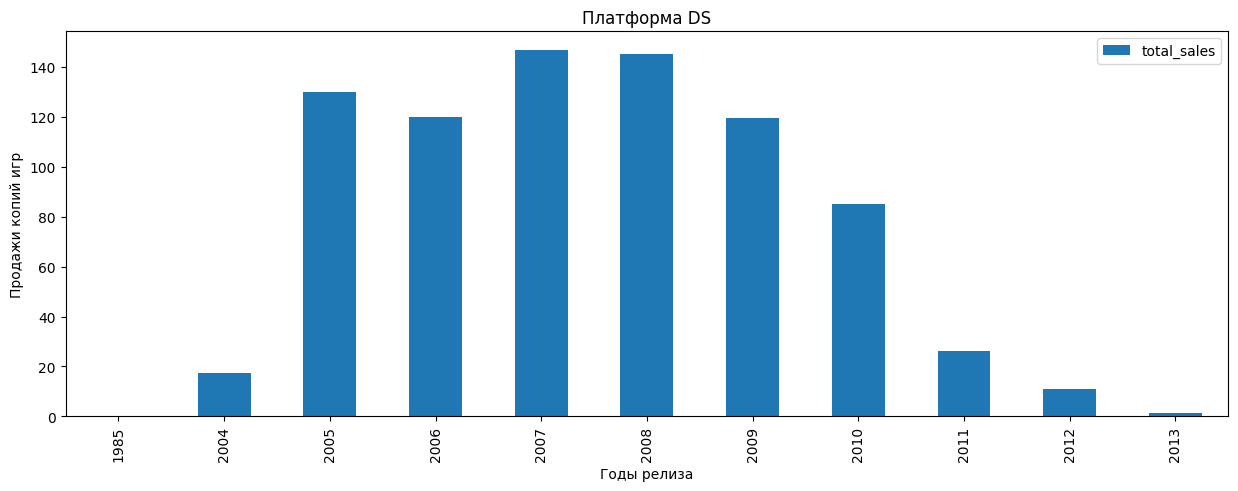

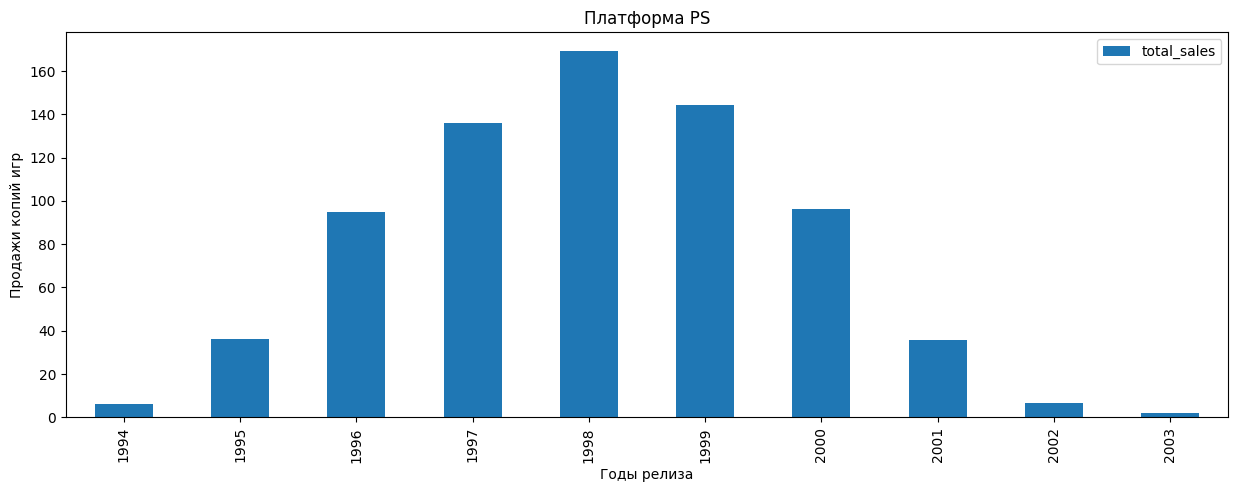

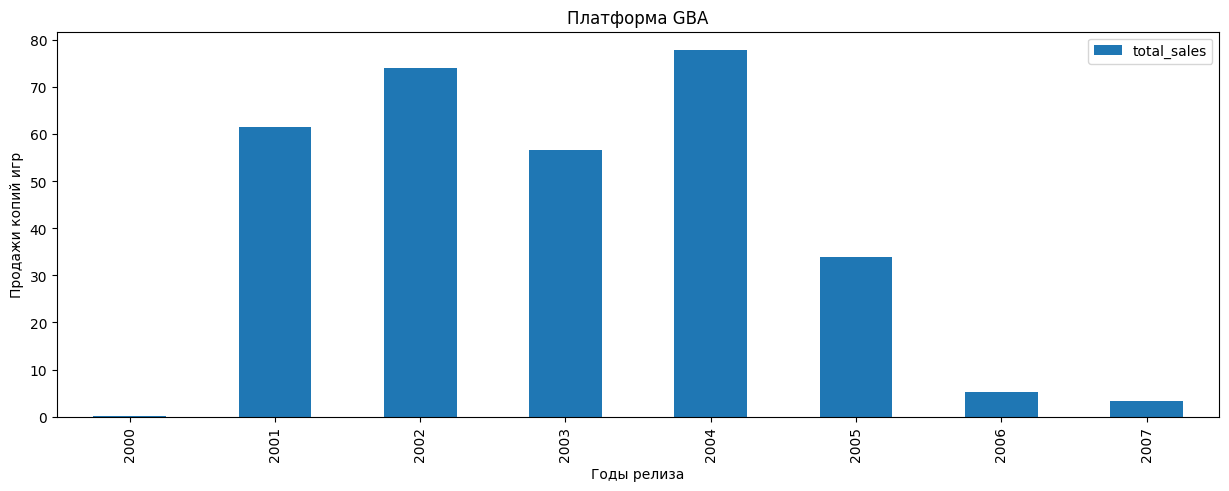

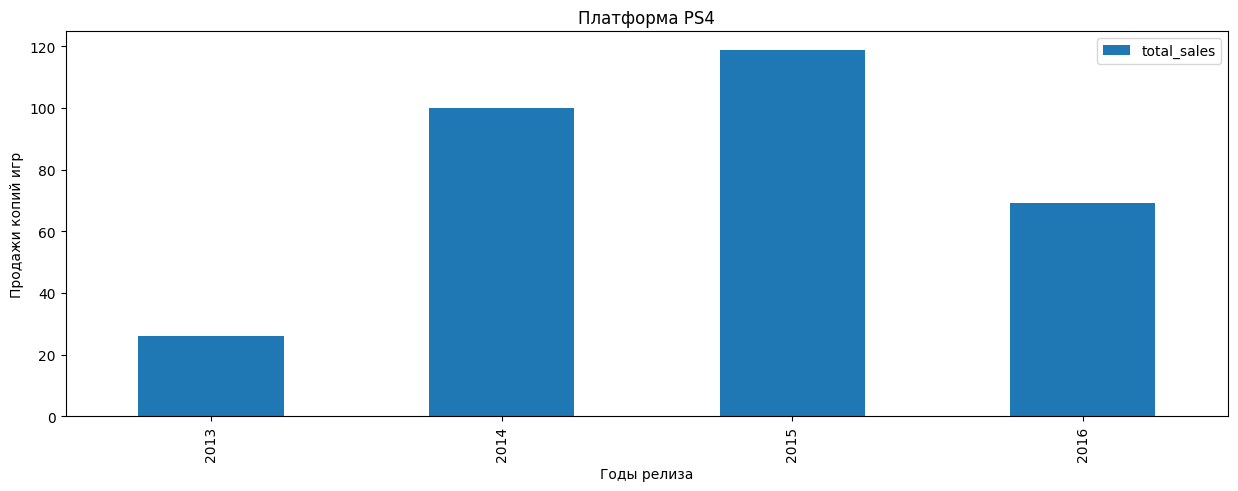

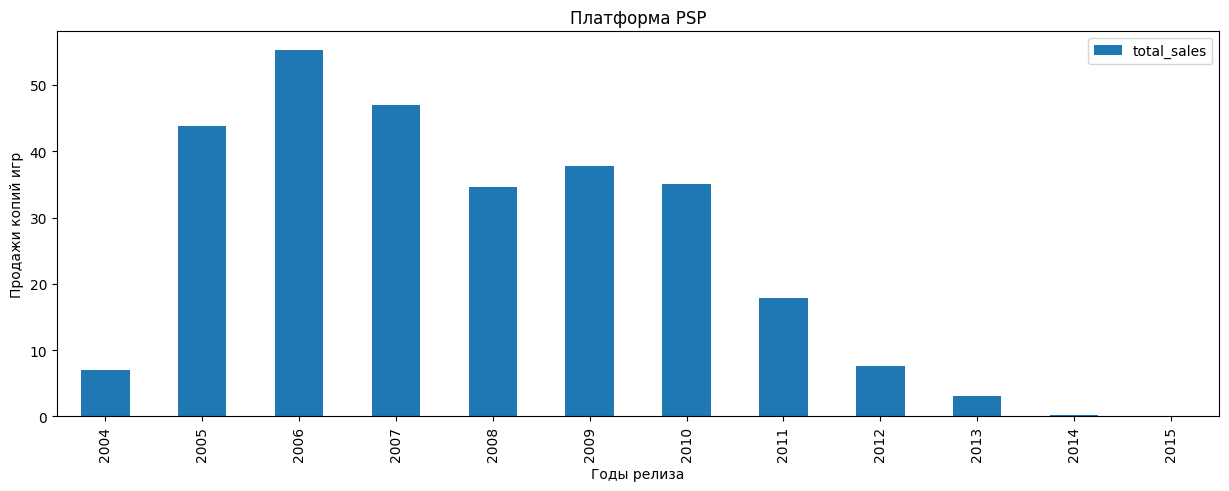

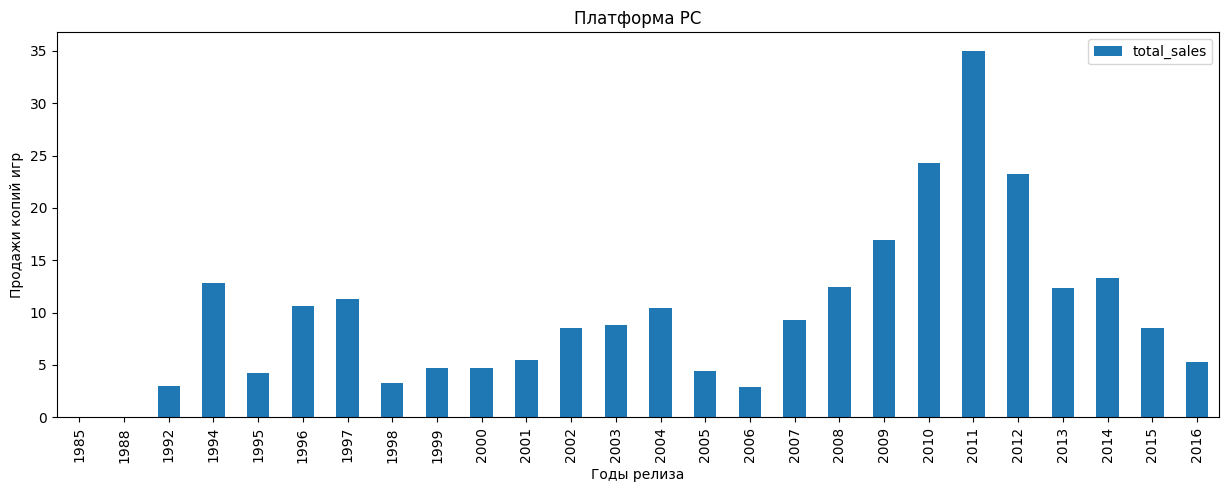

In [22]:
total_shop_to_plot = total_shop[total_shop['year_of_release'] != 0]
for platform in top10_platforms:
    plot = total_shop_to_plot[total_shop_to_plot['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plot.set_title(f'Платформа {platform}')
    plot.set_xlabel("Годы релиза")
    plot.set_ylabel("Продажи копий игр")

Можно сделать вывод что в среднем консоль живет 10 лет.
<br>Много платформ появилось в 2006 году. Однако в 2013 году заметен их резкий спад. Основной из причин является резкий рост платформ, популярных на текущий момент. Поэтому для прогнозирования продаж на следующий год охватываем данные начиная с 2013 года.

In [23]:
# Комментарий ревьюера
temp = total_shop[total_shop.year_of_release != 0].copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [24]:
total_shop = total_shop[total_shop['year_of_release']>=2013]

Определим какие платформы лидируют по продажам, растут или падают. Затем выберем несколько потенциально прибыльных платформ.

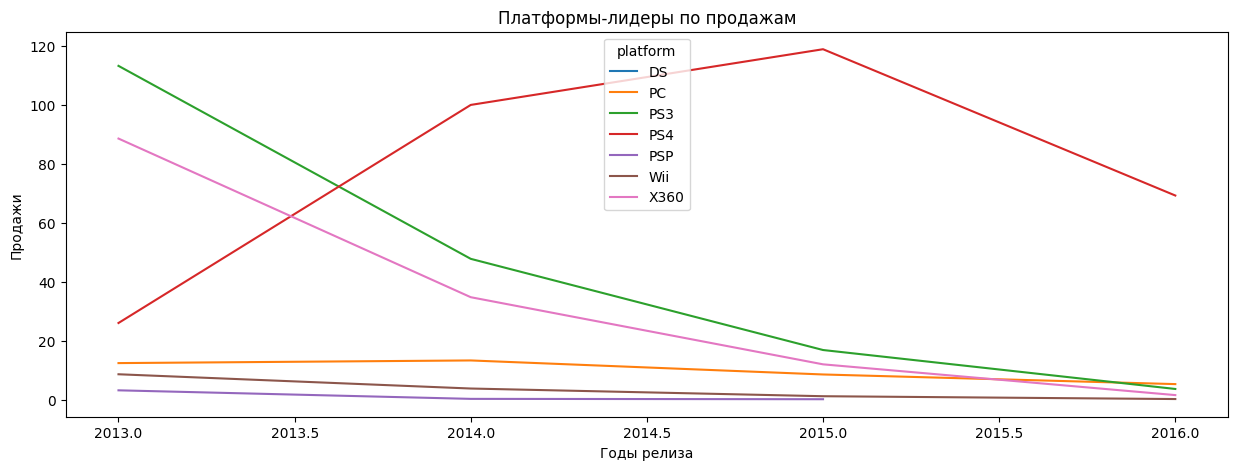

In [25]:
plot = total_shop.query('platform in @top10_platforms').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5))
plot.set_title("Платформы-лидеры по продажам")
plot.set_xlabel("Годы релиза")
plot.set_ylabel("Продажи")
plt.show()

Как видим у платформ отмечено отсутствие либо снижение по продажам. 

Тем не менее PS4 продаются гораздо чаще чем игры других платформ, возможно, потому что консоль появилась не так давно. 
PS4 можно назвать потенциально прибыльной. 
PC также можно назвать потенциально прибыльной, потому что показывает хоть небольшие, но стабильные продажи. падает сильнее всего спрос на консоли: X360, PS3. На остальные игры спрос уже давно упал, либо они вообще не продаются.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и затем опишем результат.

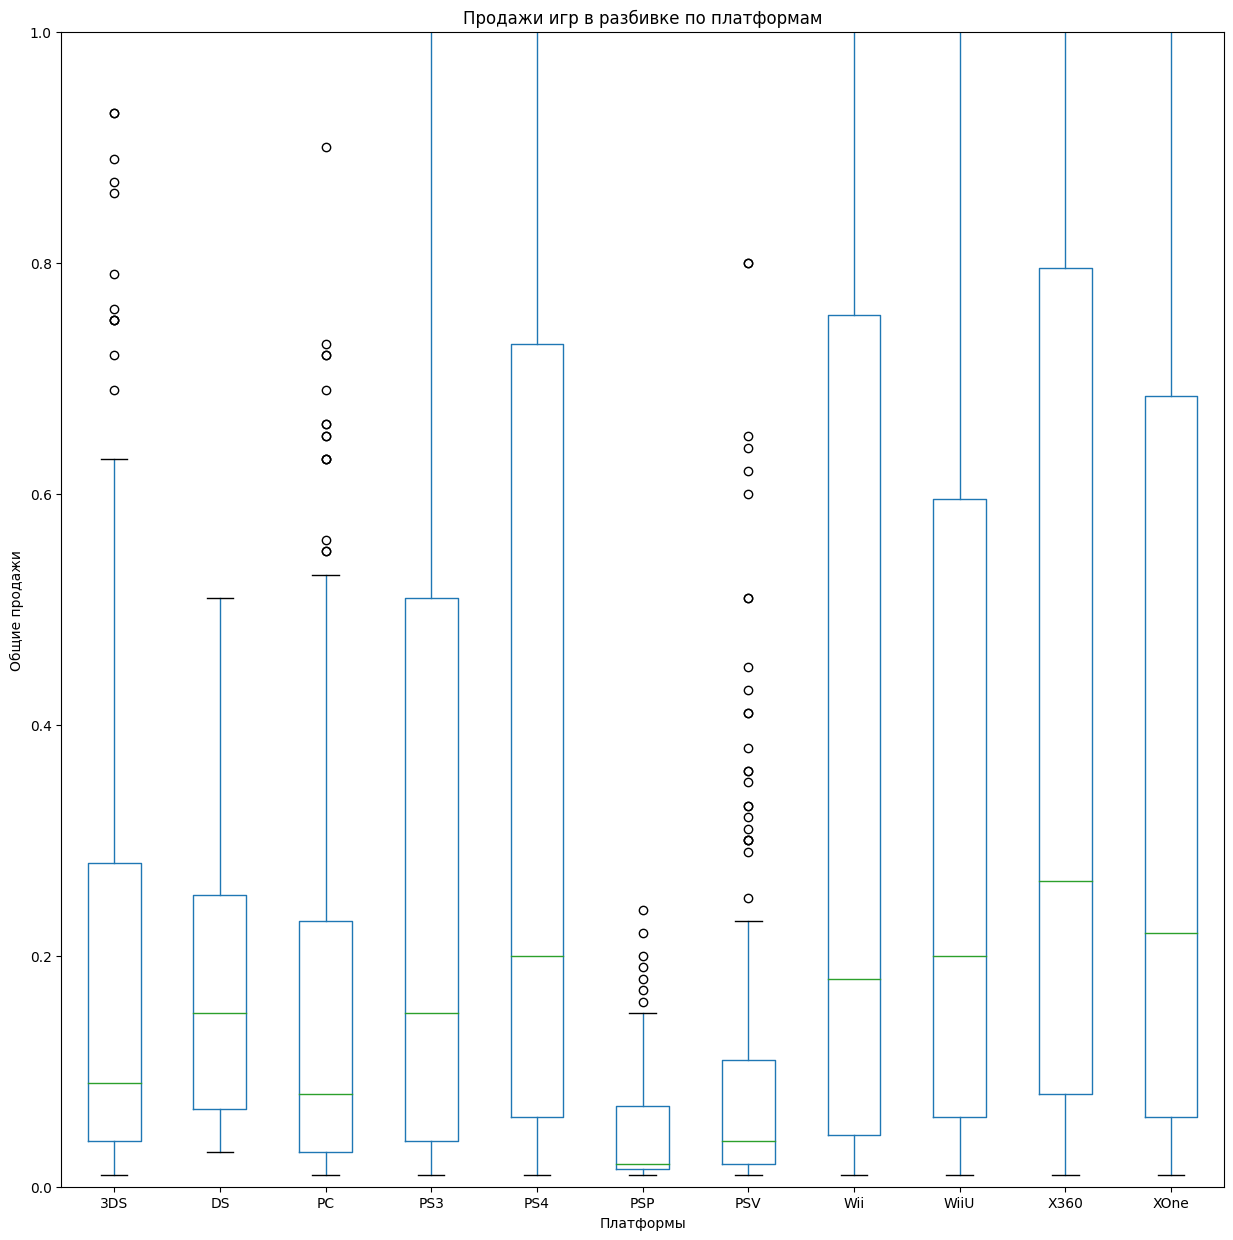

In [26]:
total_shop.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylabel = "Общие продажи",  title = "Продажи игр в разбивке по платформам",  figsize=(15, 15), ylim=(0,1))
plt.xlabel("Платформы")
plt.show()

Можно сделать следующие выводы:
    
* наибольшие медианные продажи у платформ WiiU, XOne, PS4, Wii, X360
* почти у всех платформ присутствуют выбросы. Можно сделать вывод что это наиболее популярные игры, которые имели широкое распространение
* можно отметить набирающую популярность XOne. На нее было выпущено не так много игр, поэтому мы ее не включили в предыдущий график, но игры этой консоли очень хорошо продаются, потому что медианные значения PS4 и XOne почти совпадают. Добавим XOne в список потенциально прибыльных.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграммы рассеяния там где присутствуют данные и посчитаем корреляции между отзывами и продажами по платформам и затем сформулируем выводы.

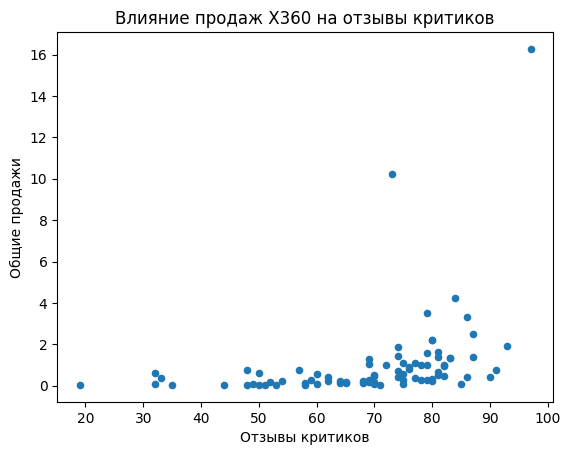

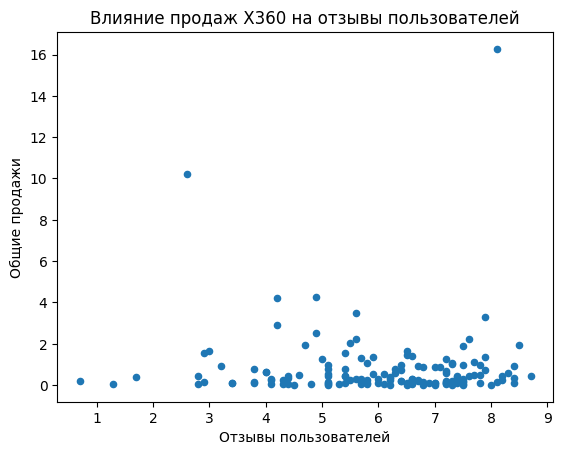

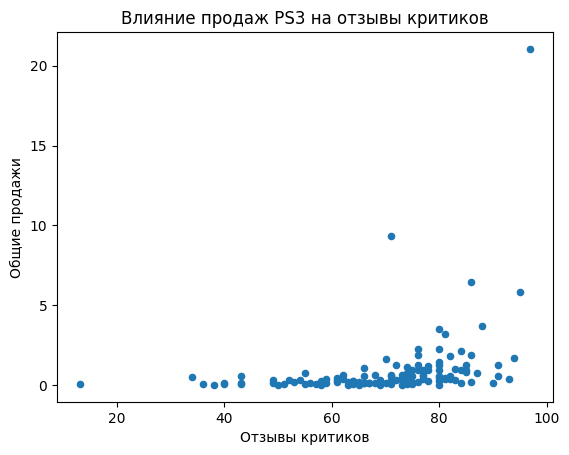

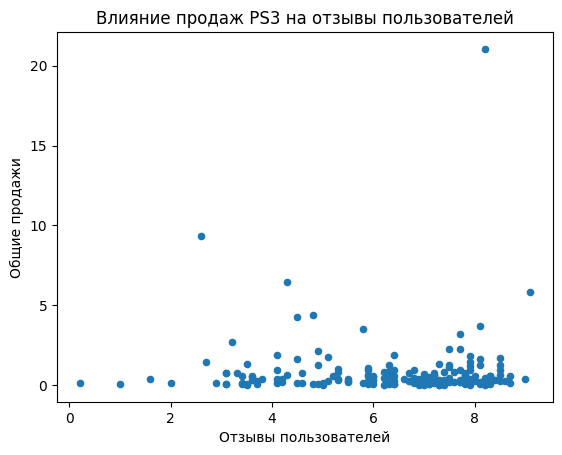

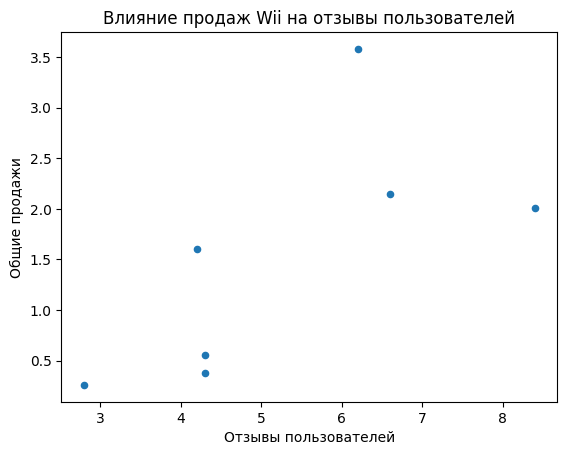

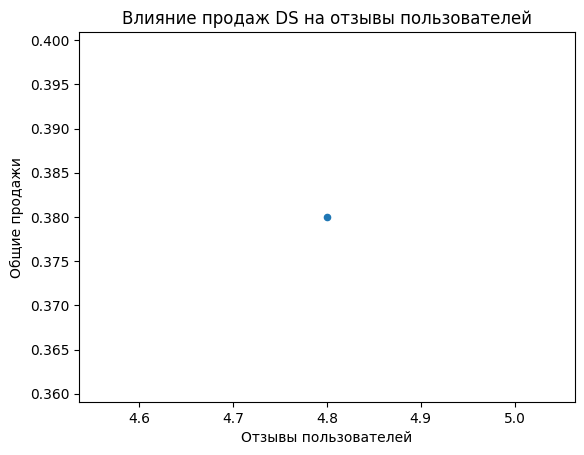

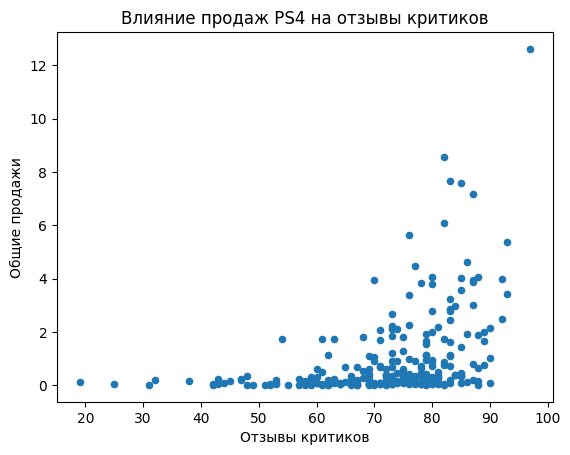

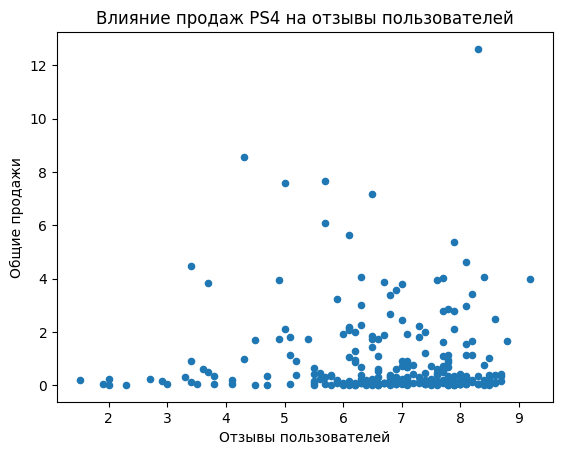

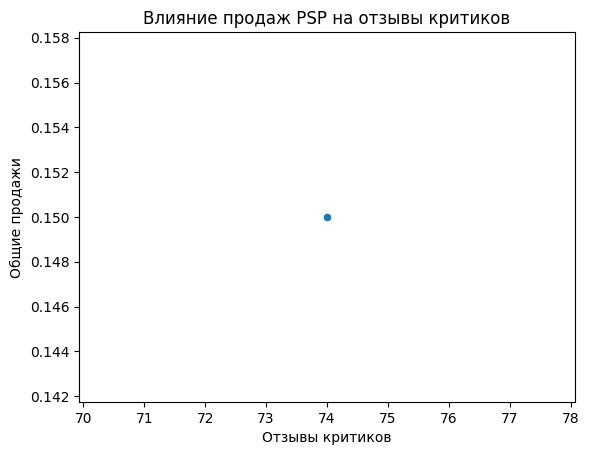

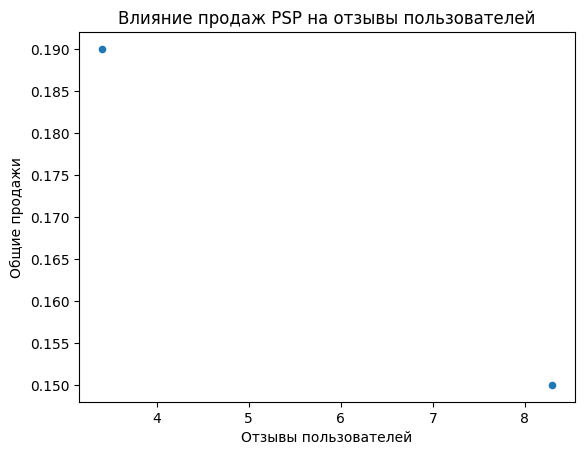

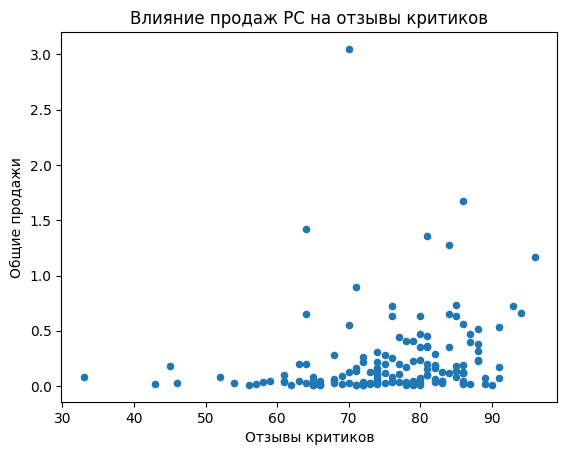

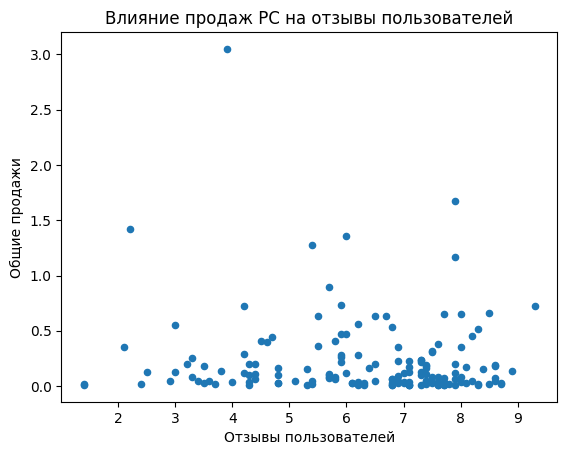

In [27]:
for platform in top10_platforms:
     
    if (total_shop.loc[(total_shop['platform'] == platform) & (total_shop['critic_score'].isnull() == False) & (total_shop['total_sales'].isnull() == False)]['platform'].empty != True):
        plot = total_shop[total_shop.platform == platform].plot(x='critic_score', y='total_sales', kind="scatter")
        plot.set_title(f'Влияние продаж {platform} на отзывы критиков')
        plot.set_xlabel("Отзывы критиков")
        plot.set_ylabel("Общие продажи")
    
    if (total_shop.loc[(total_shop['platform'] == platform) & (total_shop['user_score'].isnull() == False) & (total_shop['total_sales'].isnull() == False)]['platform'].empty != True):
        plot = total_shop[total_shop.platform == platform].plot(x='user_score', y='total_sales', kind="scatter")
        plot.set_title(f'Влияние продаж {platform} на отзывы пользователей')
        plot.set_xlabel("Отзывы пользователей")
        plot.set_ylabel("Общие продажи")
        plt.show()

Сформируем матрицы корреляции для платформ ТОП-10 где имеются значения для определения корреляции

In [28]:
for platform in top10_platforms:
    if (total_shop.loc[(total_shop['platform'] == platform) & (total_shop['total_sales'].isnull() == False)]['platform'].empty != True):
        print(f'Матрица корреляции для {platform}')
        print(total_shop[total_shop['platform'] == platform][['total_sales', 'critic_score', 'user_score']].corr())
        print()

Матрица корреляции для X360
              total_sales  critic_score  user_score
total_sales      1.000000      0.350345   -0.011742
critic_score     0.350345      1.000000    0.520946
user_score      -0.011742      0.520946    1.000000

Матрица корреляции для PS3
              total_sales  critic_score  user_score
total_sales      1.000000      0.334285    0.002394
critic_score     0.334285      1.000000    0.599920
user_score       0.002394      0.599920    1.000000

Матрица корреляции для Wii
              total_sales  critic_score  user_score
total_sales      1.000000           NaN    0.682942
critic_score          NaN           NaN         NaN
user_score       0.682942           NaN    1.000000

Матрица корреляции для DS
              total_sales  critic_score  user_score
total_sales           1.0           NaN         NaN
critic_score          NaN           NaN         NaN
user_score            NaN           NaN         NaN

Матрица корреляции для PS4
              total_sales  cr

Исходя из полученных данных можно сделать следующие выводы:

* для PS4 положительная корреляция между общими продажами и оценками критиков присутствует и она равна 0.4. Корреляция между общими продажами и оценками пользователей стремится к нулю, можно говорить об отсутствии корреляции
* для X360 положительная корреляция между общими продажами и оценками критиков присутствует и она равна 0.35. Корреляция между общими продажами и оценками пользователей стремится к нулю, можно говорить об отсутствии корреляции
* для PS3 положительная корреляция между общими продажами и оценками критиков присутствует и она равна 0.33. Корреляция между общими продажами и оценками пользователей стремится к нулю, можно говорить об отсутствии корреляции
* для Wii положительная корреляция между общими продажами и оценками пользователей присутствует и она равна 0.68. Корреляции между общими продажами и оценками критиков не существует вследствие отсутствия данных
* для DS ни одной из корреляций не замечено вследствие отсутствия данных 
* для PSP замечена полная отрицательная корреляция между оценками пользователей и общими продажами
* для PC положительная корреляция между общими продажами и оценками критиков присутствует и она равна 0.2. Корреляция между общими продажами и оценками пользователей стремится к нулю, можно говорить об отсутствии корреляции

Исходя из построенных графиков можно говорить что по платформам PC, PS4, XOne оценки критиков влияют на количество продаж, а оценки пользователей не принимаются во внимание.
По остальным платформам, входящим в ТОП-10 можно говорить что оценки критиков слабо влияют на продажи, а корреляции оценки пользователей с качеством продаж не прослеживается.

Посмотрим на общее распределение игр по жанрам. 

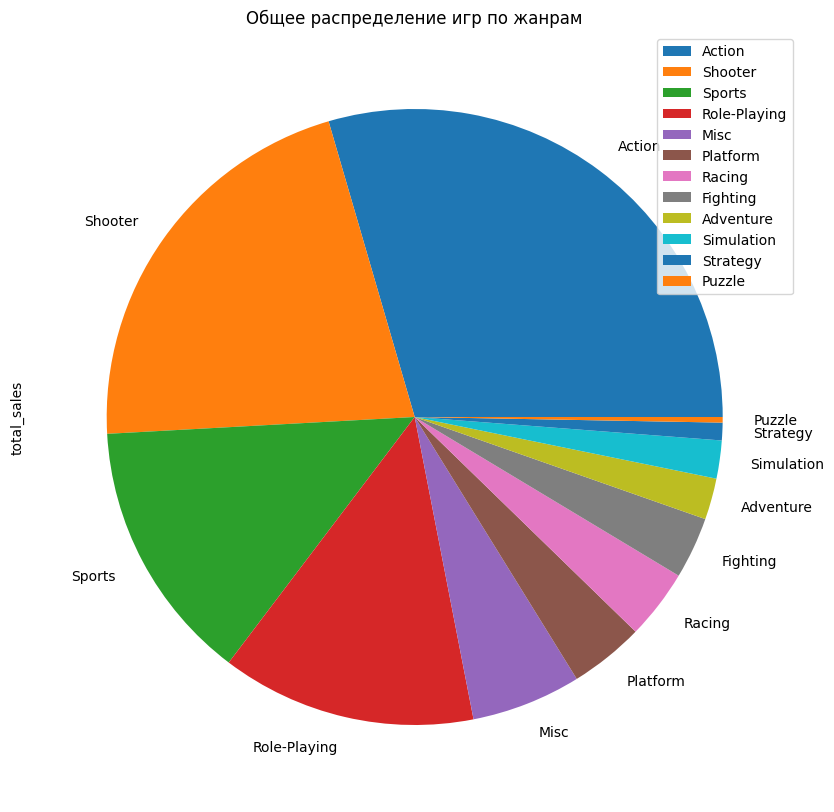

In [29]:
total_shop.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales').plot(kind='pie', figsize=(10,10), y='total_sales')
plt.title("Общее распределение игр по жанрам")
plt.show()

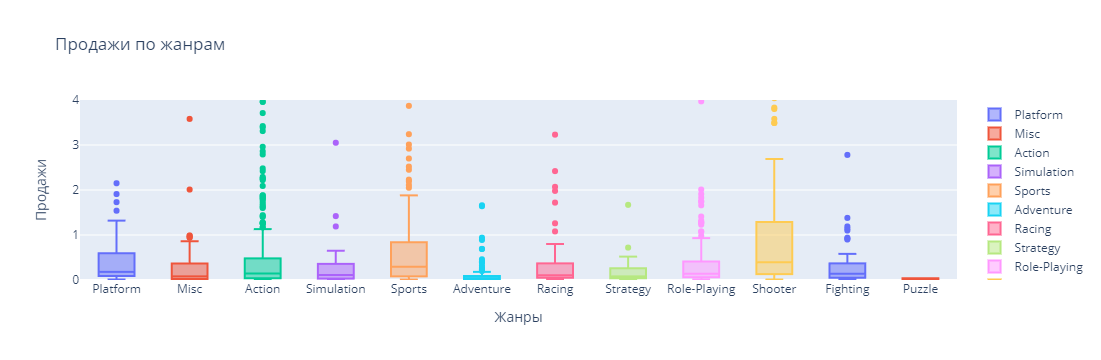

In [30]:
total_data = total_shop.query('platform in @top10_platforms').pivot_table(index=['name', 'platform', 'genre'], values='total_sales').sort_values(by='platform').reset_index()
total_to_iplot = []
for index in total_data.genre.unique():
    total_to_iplot.append(go.Box(y=total_data[total_data.genre == index]['total_sales'], name=index ))
    
layout = {'title': 'Продажи по жанрам', 'xaxis_title': "Жанры", 'yaxis_title': "Продажи"}
fig = go.Figure(data=total_to_iplot, layout=layout)
fig.update_layout(yaxis=dict(range=[0,4]))

Можно сделать вывод что наиболее высокие стабильные медианные продажи на всех континентах имеют шутеры. Далее идут спортивные игры, а затем экшны. У экшнов наиболее часто наблюдаются выбросы. Это говорит о том что опреленные игры жанра экш имеют огромный успех на определенных континентах, но в то же время другие игры этого же жанра на том же континенте заметно проигрывают по популярности.

<b>Составление портрета пользователя каждого региона

Опишем функцию визуализации графиков популярности платформ по каждому региону

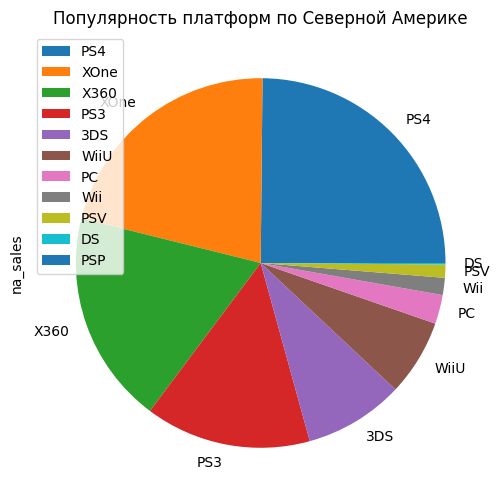

In [31]:
# визуализируем распределение продаж по платформам в Северной Америке
total_shop.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind='pie', figsize=(6,6), y='na_sales', title = 'Распределение продаж по платформам в Северной Америке')
plt.title("Популярность платформ по Северной Америке")
plt.show()

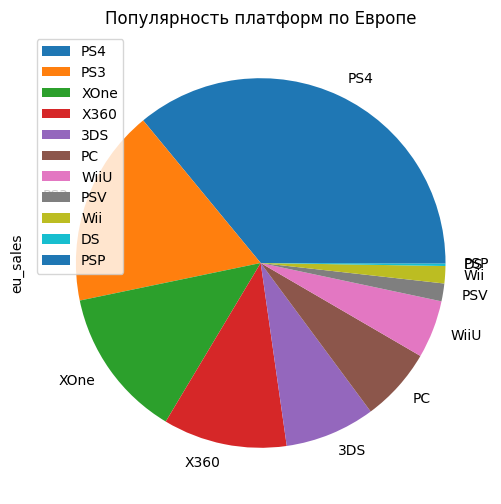

In [32]:
# визуализируем распределение продаж по платформам в Европе
total_shop.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind='pie', figsize=(6,6), y='eu_sales', title = 'Распределение продаж по платформам в Европе')
plt.title("Популярность платформ по Европе")
plt.show()

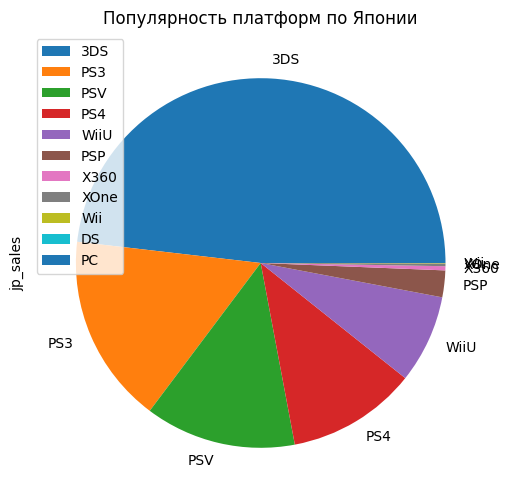

In [33]:
# визуализируем распределение продаж по платформам в Японии
total_shop.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind='pie', figsize=(6,6), y='jp_sales', title = 'Распределение продаж по платформам в Японии')
plt.title("Популярность платформ по Японии")
plt.show()

In [34]:
# опишем функцию составления столбчатых диограмм
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = total_shop.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:10]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'red', 'eu_sales': 'yellow', 'jp_sales': 'green'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

Распределение платформ по популярности


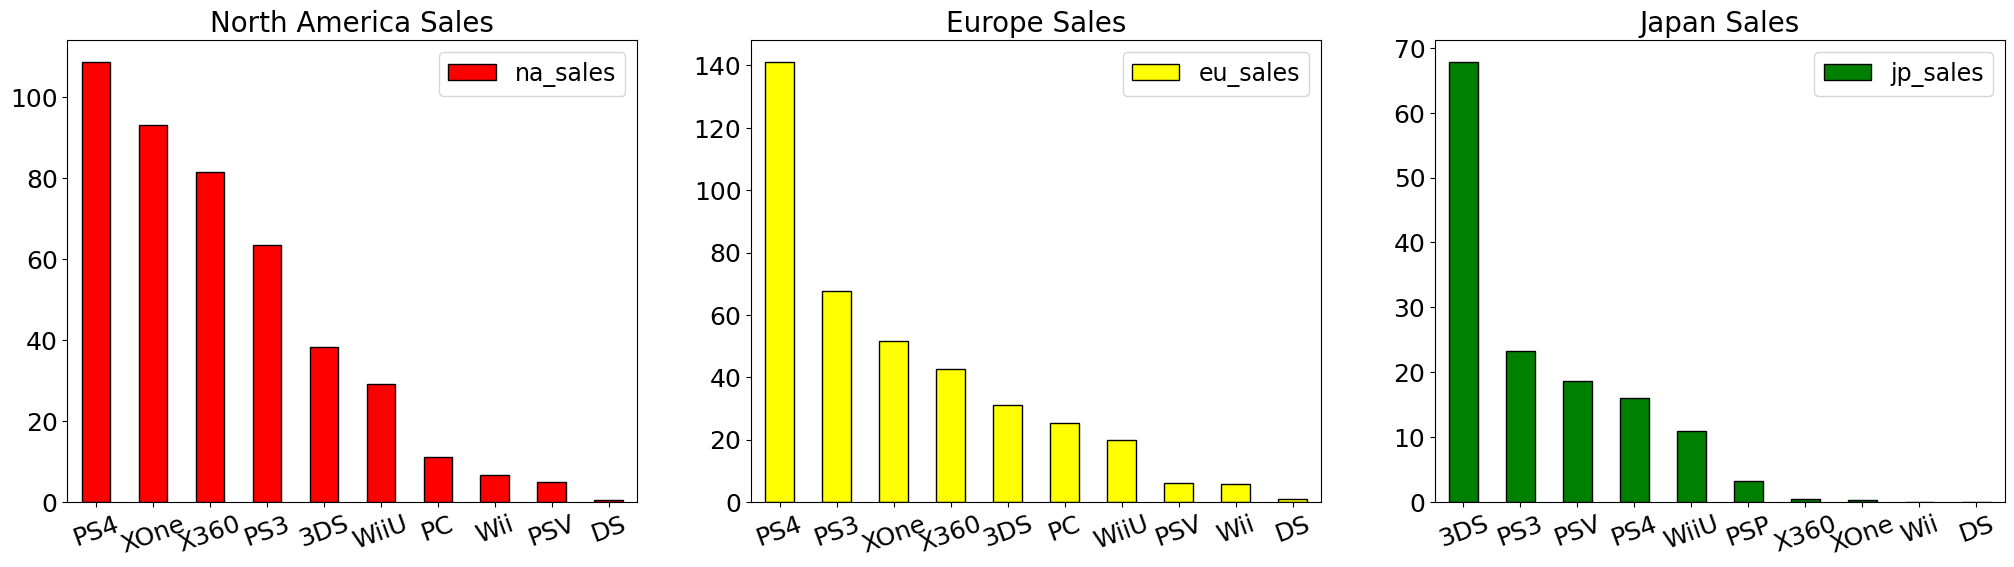

In [35]:
# сформируем столбчатые диограммы
print ('Распределение платформ по популярности')
fig, axes = plt.subplots(1, 3, figsize=(25,6))
top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В Северной Америке и в Европе лидерство занимает PS4, на Японском рынке лидерство у 3DS.
Второе место в Северной Америке занимает XOne местного производителя Microsoft, в Европе Xone занял третье место.
В Японии первое место занял 3DS местного производителя Nintendo.

Далее визуализируем распределение жанров от континента продажи

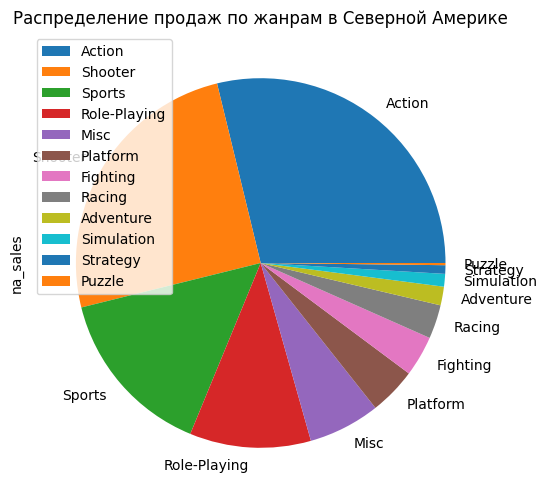

In [36]:
# визуализируем распределение продаж по жанрам в Северной Америке
total_shop.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind='pie', figsize=(6,6), y='na_sales', title = 'Распределение продаж по жанрам в Северной Америке')
plt.show()

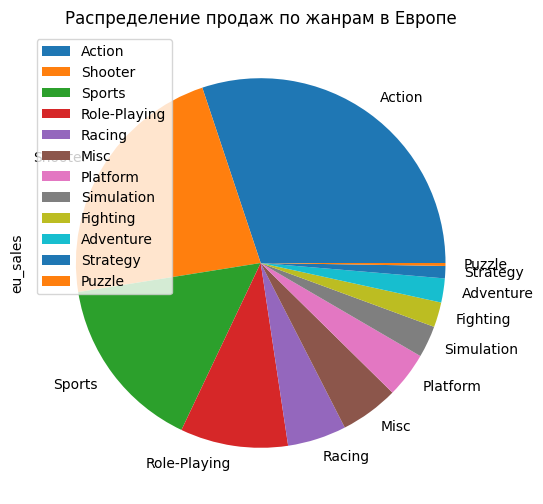

In [37]:
# визуализируем распределение продаж по жанрам в Европе
total_shop.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind='pie', figsize=(6,6), y='eu_sales', title = 'Распределение продаж по жанрам в Европе')
plt.show()

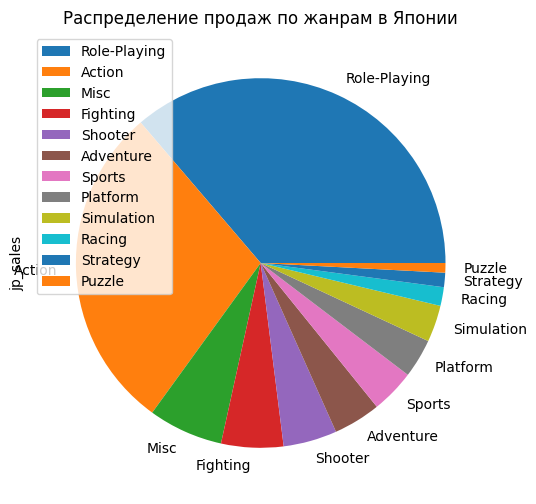

In [38]:
# визуализируем распределение продаж по жанрам в Японии
total_shop.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind='pie', figsize=(6,6), y='jp_sales', title = 'Распределение продаж по жанрам в Японии')
plt.show()

Распределение жанров по популярности


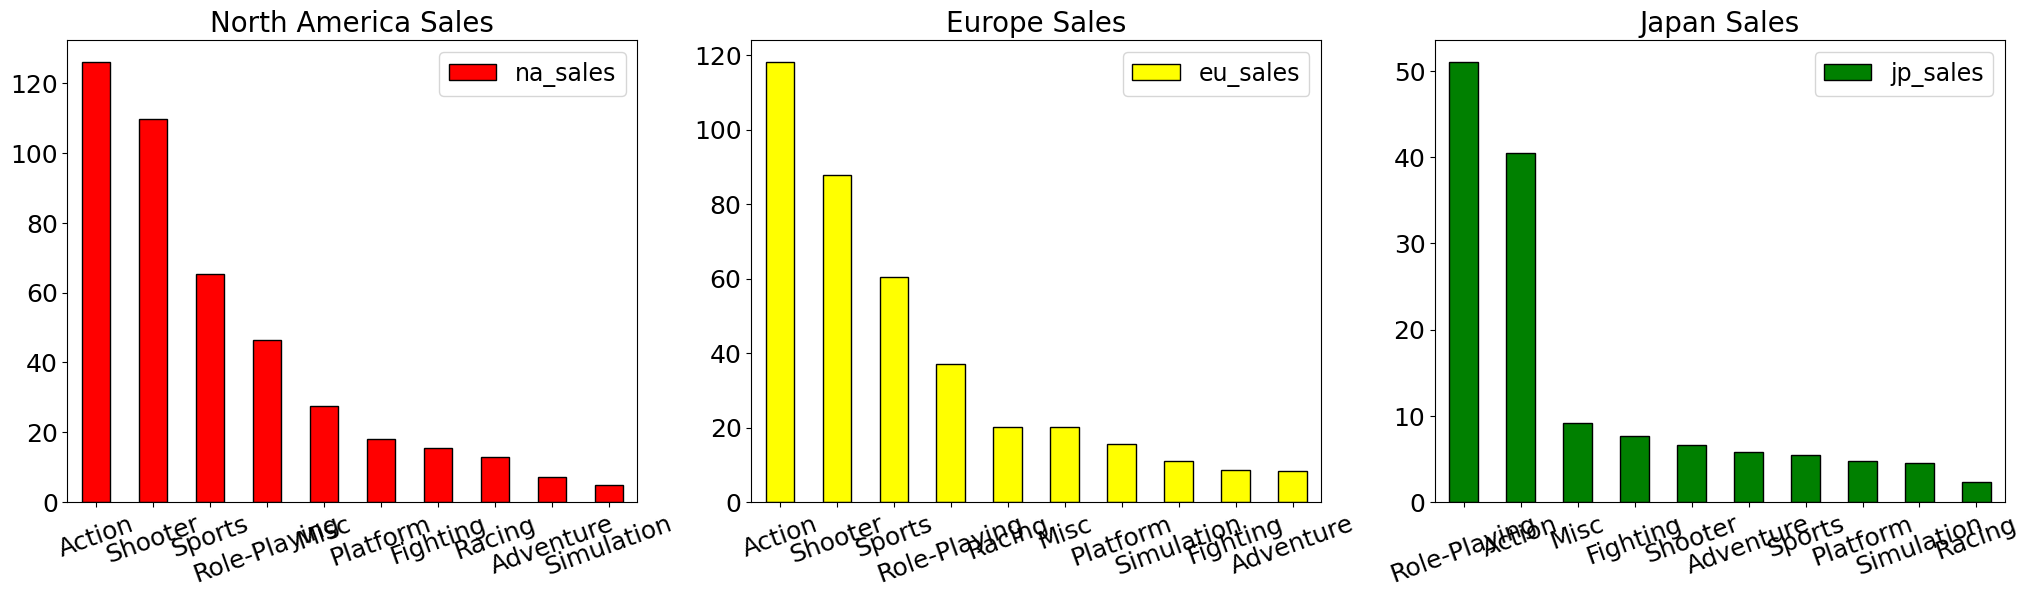

In [39]:
# сформируем графики
print ('Распределение жанров по популярности')
fig, axes = plt.subplots(1, 3, figsize=(25,6))
top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

В Европе и Северной Америке первые места по популярности занимают экшены, спортивные игры, шутеры, ролевые игры.
В Японии на первом месте ролевые игры. Далее идут спортивные игры.

Далее визуализируем влияние рейтинга ESRB на продажи в каждом регионе

In [40]:
# формируем новый столбец с расшифровкой рейтинга ESRB
ESRB_dict = {'E': 'Для всех','EC': '> 6 лет', 'E10+': '> 10 лет', 'M': '> 17 лет', 'T': '> 13 лет', 'AO': 'Для взрослых', 'RP': 'Рейтинг обсуждается', 'undefined': 'Не определен'}
total_shop['ESRB_description'] = total_shop[total_shop['rating'].notnull()]['rating'].map(ESRB_dict)

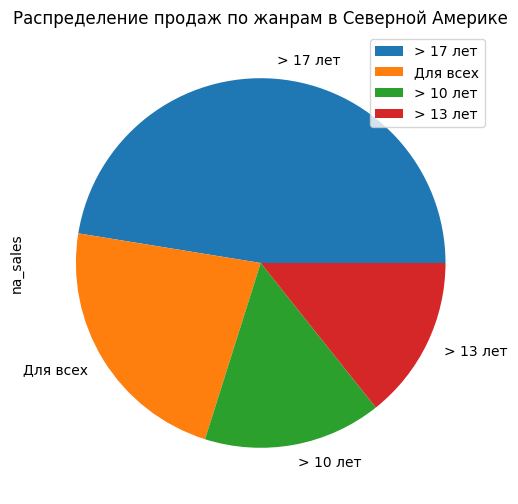

In [41]:
# визуализируем распределение рейтинга ESRB в Северной Америке
total_shop.pivot_table(index = 'ESRB_description', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind='pie', figsize=(6,6), y='na_sales', title = 'Распределение продаж по жанрам в Северной Америке')
plt.show()

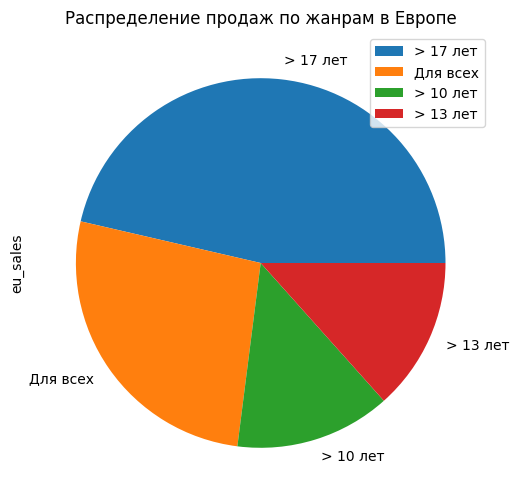

In [42]:
# визуализируем распределение рейтинга ESRB в Европе
total_shop.pivot_table(index = 'ESRB_description', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind='pie', figsize=(6,6), y='eu_sales', title = 'Распределение продаж по жанрам в Европе')
plt.show()

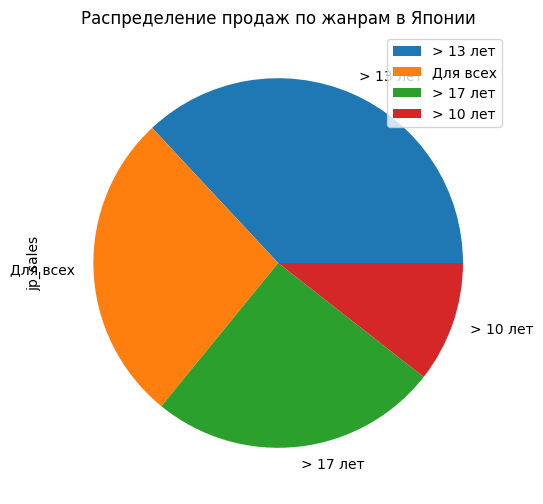

In [43]:
# визуализируем распределение рейтинга ESRB в Японии
total_shop.pivot_table(index = 'ESRB_description', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind='pie', figsize=(6,6), y='jp_sales', title = 'Распределение продаж по жанрам в Японии')
plt.show()

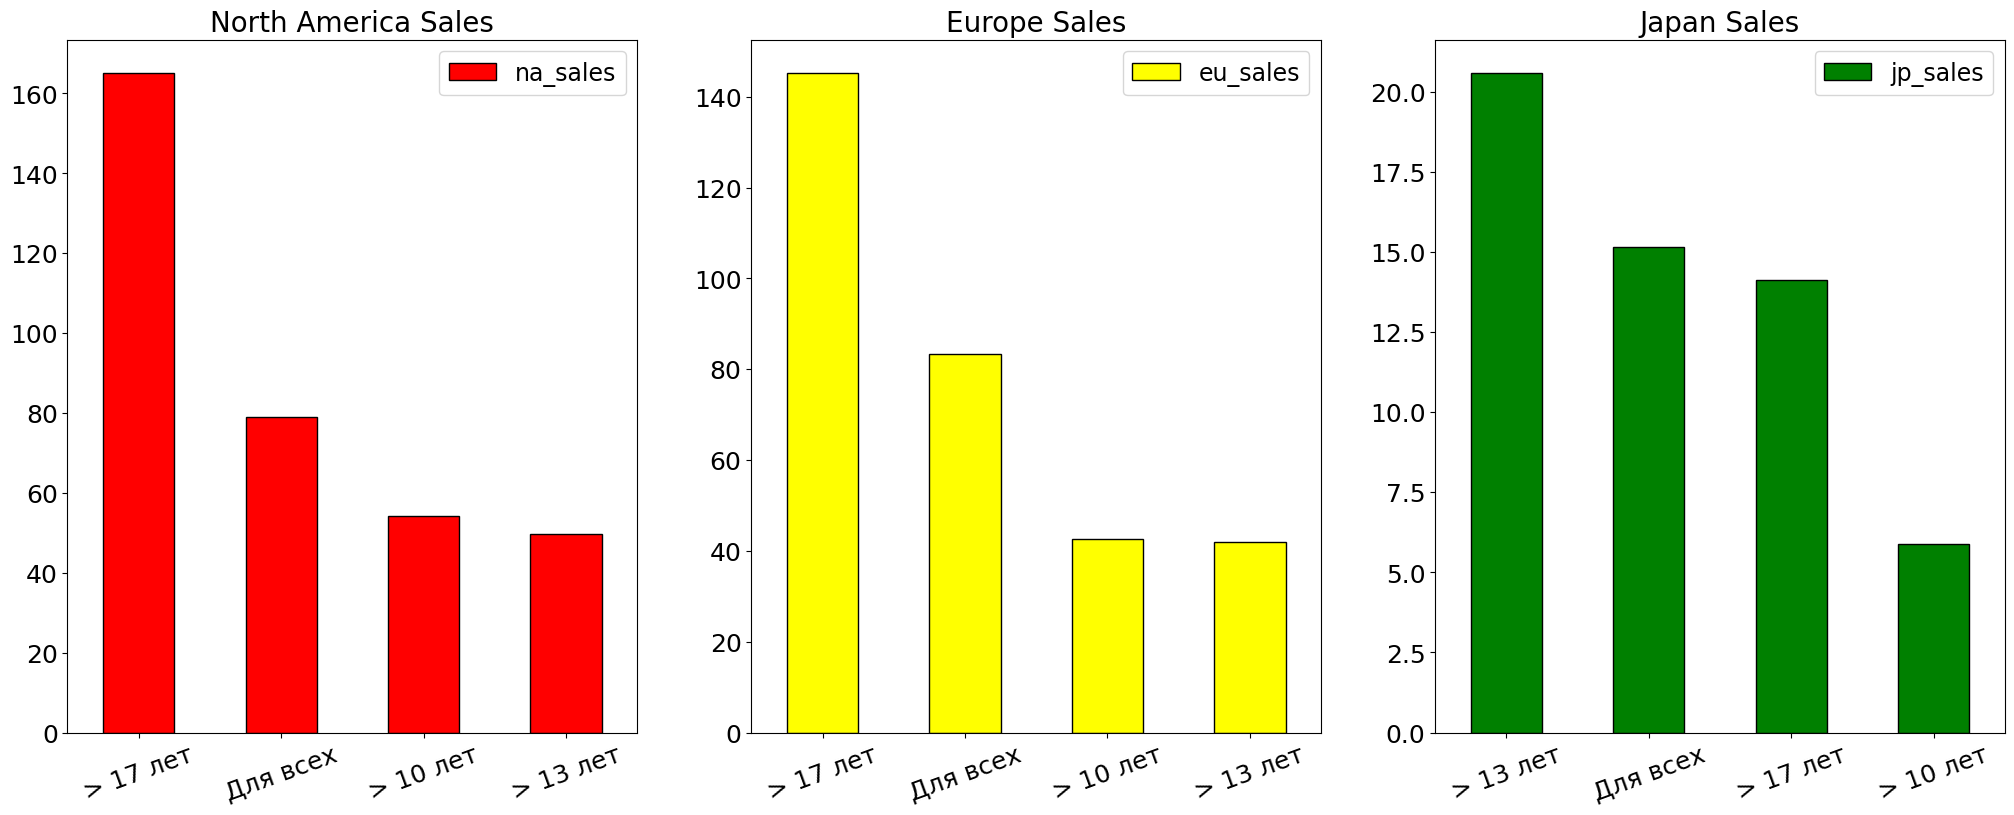

In [44]:
# построим столбчатые диограммы
fig, axes = plt.subplots(1, 3, figsize=(25,9))
top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

В Северной Америке и в Европе большая часть игр выпускается с рейтингом "17 лет", далее идут игры "Для всех", "10 лет", "13 лет".
<br> В Японии преобладает рейтинг "13 лет", далее идут игры "Для всех", "17 лет", "10 лет".

In [45]:
# Комментарий ревьюера
temp = total_shop.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

977 0.43752798925212716


NaN     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

<b>Проверка гипотез

Проверим гипотезу о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую и альтернативную гипотезы

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
<br>H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [46]:
# сформируем Series с набором рейтингов для XOne и PC
XOne = total_shop[(total_shop['platform'] == 'XOne') &  (total_shop['user_score'] > 0)]['user_score']
PC = total_shop[(total_shop['platform'] == 'PC') &  (total_shop['user_score'] > 0)]['user_score']

In [47]:
#проверяем первую гипотезу
alpha = .05
results = st.ttest_ind(XOne, PC)
print(results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

0.14012658403611647
Не отвергаем нулевую гипотезу


На основании имеющихся данных, на уровне значимости 5% (уровне доверия 95%) невозможно отвергнуть нулевую гипотезу о равенстве средних значений оценок пользователей платформ XOne и PC в пользу альтернативной. Это можно объяснить тем что XOne и PC имеют похожий набор игр, следовательно рейтинг у них будет одинаковый.

Проверим гипотезу о том что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы

H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [48]:
Action = total_shop[(total_shop['genre'] == 'Action') &  (total_shop['user_score'] > 0)]['user_score']
Sports = total_shop[(total_shop['genre'] == 'Sports') &  (total_shop['user_score'] > 0)]['user_score']

In [49]:
alpha = .05

results = st.ttest_ind(Action, Sports,)

print(results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

1.0517832389140023e-27
Отвергаем нулевую гипотезу


Исходя из имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу о различии между средними значениями оценок пользователей жанров Action и Sports в пользу альтернативы. Верное утверждение, что средние пользовательские рейтинги жанров Action и Sports отличаются.

Обе гипотезы подтвердились.

Поскольку у нас стояла задача определения возможного равенства средних значений пользовательского рейтинга платформ Xbox One и PC, а также пользовательского рейтинга жанров Action и Sport, то для этих задач мы применяем двухвыборочный t-критерий, который используется для определения того, равны ли два средних значения генеральной совокупности. Также применение двухвыборочного t-критерия актульно для нас по той причине что мы допускаем неравенство значений как в сторону увеличения, так и в сторону уменьшения.

<br> Обе гипотезы были сформулированы следующим образом: 
поскольку в обеих задачах было необходимо подтвердить или опровергнуть равенство средний значений, то нулевые гипотезы будут содержать предположение что средние значения равны. Это соответствует определению нулевой гипотезы, а именно: нулевая гипотеза представляет собой предположение о том, что между исследуемыми переменными нет значимой разницы или связи.
<br>Альтернативная гипотеза представляет собой предположение, противоположное нулевой гипотезе. Она утверждает наличие разницы, эффекта или связи между исследуемыми переменными.

<b>Общий вывод

Предобработка данных
<br>
* ознакомились с данными, посмотрели на общую информацию о датасете, выявили пропуски и не соответствие типов данных.
* заполнили некоторые пропуски, обнаружили необычное значени tbd - "to be determined" и заменили это значение на NaN.
* некоторые пропуски, например в столбцах оценок оставили незаполненными, чтобы не исказить статистику.
* посчитали общее количество продаж по всем регионам и записали результат в столбец total_sales.

Исследовательский анализ данных
<br>
* было выявлено что характерный срок жизни платформы - 10 лет, поэтому проанализировали данные с 2013 по 2016 гг.
* потенциально прибыльных платформы - PS4, PC
* наибольшие медианные продажи у платформ WiiU, XOne, PS4, Wii, X360
* Больше всего продаётся игр жанра Action

Портрет пользователя региона
<br>
* В Северной Америке и в Европе лидерство занимает PS4, на Японском рынке лидерство у 3DS. Второе место в Северной Америке занимает XOne местного производителя Microsoft, в Европе Xone занял третье место. В Японии первое место занял 3DS местного производителя Nintendo
* В Европе и Северной Америке первые места по популярности занимают экшены, спортивные игры, шутеры, ролевые игры. В Японии на первом месте ролевые игры. Далее идут спортивные игры.

Проверка гипотез
<br>
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые.Гипотеза подтвердилась.
* средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.Гипотеза подтвердилась.

Исследование показало что лучше всего для продажи подходят игры для таких приставок как PS4 с шанром шутер и с рейтингом "от 17 и выше". В это случае продажи будут значительно выше, чем если использовать для продажи другие игры.